<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Algorismes sobre grafs</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pylab as plt
import numpy as np
import random

## Recordatori: DFS

In [3]:
def dfs(G, visited, current_node):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim
    if current_node not in visited:        
        print(current_node, end=' ')
        visited.add(current_node)

        # Per a cada veí del node actual, cridem de nou a la funció DFS per seguir visitant
        for nei in G.neighbors(current_node):
            dfs(G, visited, nei)        

DFS: 0 1 2 3 4 5 6 7 8 9 

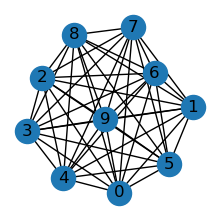

In [4]:
import networkx as nx
G = nx.random_geometric_graph(10, 3)

print('DFS: ',end='')
dfs(G, set(), 0)

plt.figure(figsize=(2, 2))
nx.draw(G, with_labels=True)

## Component connexa

Sigui $G$ un graf, una __component connexa__ és un subgraf $S\subset G$ tal que, per a dos nodes qualsevols de $S$, existeix un camí dins de $S$ que els connecta i per a qualsevol parella de nodes de $G$ on $n_1\in S$, $n_2\notin S$, no existeix un camí entre $n_1$ i $n_2$.

Observeu l'exemple següent. Aquest graf té tres compoenents connexes:

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" alt="image info" style="width:20%"/>

# Problema 1
Donat un graf, escriu un algorisme que retorni el nombre de components connexes que conté i una llista de llistes amb tots els nodes de cada component connexa.

In [5]:
def dfs_connected_components(G, visited, current_node, llista):
    # Versió recursiva del DFS.
    
    # Si el node actual no està visitat, l'afegim a la llista de la component connexa i lo marquem com visitat
    if current_node not in visited:        
        llista.append(current_node)
        visited.add(current_node)
        # Per a cada veí del node actual, cridem de nou a la funció per seguir visitant
        for nei in G.neighbors(current_node):
            dfs_connected_components(G, visited, nei, llista)   

In [6]:
def connected_components(G):
    numComponents = 0
    visited = set()
    finalPrint = []
    
    nodes = list(G.nodes)
    
    #visitem cada node del graf
    for current_node in nodes:
        #si aquest node no esta visitad es que hem trobat nova component conexa
        if current_node not in visited:
            llista = []
            #cridem la funció auxiliar i afegim els valors a les variables resultat (+1 num.Comp. i llista de nodes)
            dfs_connected_components(G, visited, current_node, llista)
            numComponents += 1
            finalPrint.append(llista)     
            
    print(f'( {numComponents} , {finalPrint})')

( 3 , [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12, 13, 14]])
None


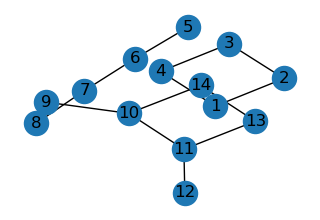

In [9]:
G = nx.Graph([(1,2),(2,3),(3,4),(4,1),(5,6),(6,7),(7,8),(9,10),(10,11),(11,12),(11,13),(13,14),(14,10)])
plt.figure(figsize=(3, 2))
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True)

print(connected_components(G))

## Grafs bipartits

Diem que un graf és __bipartit__ si podem separar els seus nodes en dos grups de manera que els nodes del primer grup només tinguin arestes cap a nodes del segon grup (i viceversa). És a dir, que no existeixin arestes que connectin nodes d'un mateix grup: 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Simple-bipartite-graph.svg" alt="bipartite graph" style="width: 25%" />

Networkx ens permet generar grafs bipartits aleatoris utilitzant la funció `random_graph()` del mòdul _bipartite_. Aquesta funció rep tres paràmetres $n, m, p$ on:
- $n$ és el nombre de nodes del primer grup.
- $m$ és el nombre de nodes del segon grup.
- $p$ és la probabilitat de creació d'arestes (0 per no crear-ne cap i 1 per crear-les totes).

La visualització següent mostra el mateix graf usant dos _layouts_ diferents. La primera figura mostra el layout per defecte on no és fàcil veure si el graf és bipartit o no. En el segon, podem veure clarament els dos grups i com les arestes no connecten nodes d'un mateix grup.

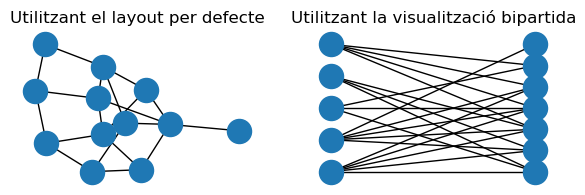

In [33]:
# Generem un graf bipartit connectat (tots els nodes tenen com a mínim una aresta associada)
G = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G = nx.algorithms.bipartite.random_graph(5,7,0.6)

top = nx.bipartite.sets(G)[0]
posbi = nx.bipartite_layout(G, top)

# Mostrem el mateix graf de dues formes diferents
fig, axs = plt.subplots(1,2, figsize=(7,2))
axs[0].set_title('Utilitzant el layout per defecte')
nx.draw(G, ax=axs[0])

axs[1].set_title('Utilitzant la visualització bipartida')
nx.draw(G, pos=posbi, ax=axs[1])

# Problema 2
Implementeu un algorisme per a determinar si un graf és bipartit. Assumirem que el graf està connectat (entre dos nodes qualsevols sempre existeix un camí) i és NO dirigit.

- Podeu utilitzar el diccionari intern de cada node per a guardar-hi informació: <br>$G.nodes[idx][clau]$ on $idx$ és l'index del node i $clau$ és qualsevol paraula que identifica l'atribut del node.
- Podeu usar la funcio 'neighbors' per a retornar els veïns d'un node.
- Per a que sigui més senzill, definiu una funció auxiliar que es basi en el DFS per a fer la cerca.

In [34]:
# Generem un graf bipartit
# En aquest problema, ens assegurem que el graf generat no tingui nodes aïllats
G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)
while not nx.is_connected(G):
    G_bi = nx.algorithms.bipartite.random_graph(5,7,0.6)

# Al crear un graf bipartit, es crea un atribut anomenat 'bipartite' que pren valors 0 i 1. Els eliminem ja que no els usarem en la nostra solució
for n in G_bi.nodes():
    del G_bi.nodes[n]['bipartite']

In [35]:
# Generem un graf NO bipartit
G_geo = nx.random_geometric_graph(10, 3)

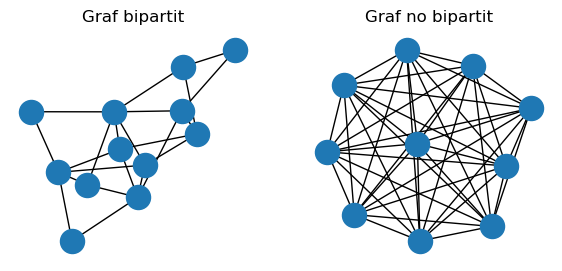

In [38]:
# Mostrem els grafs que hem creat
fig, axs = plt.subplots(1,2, figsize=(7,3))
axs[0].set_title('Graf bipartit')
nx.draw(G_bi, ax=axs[0])

axs[1].set_title('Graf no bipartit')
nx.draw(G_geo, ax=axs[1])

In [39]:
def dfs_paint(G, node_actual, color):
    
    # Comprovem si ja hem visitat el node actual n, igual que abans
    # Li assignem un color en cas que no ho haguem fet encara
    if 'color' not in G.nodes[node_actual]:
        G.nodes[node_actual]['color'] = color          
        
        # Per cada veí del node, si ja està pintat, comprovem si son o no del mateix color. 
        # Si ho son, ja hem acabat i l'algorisme ha de retornar False
        for nei in G.neighbors(node_actual):     
            if 'color' in G.nodes[nei]: # Comprovem si el veí està visitat
                if G.nodes[nei]['color'] == G.nodes[node_actual]['color']: # Comprovem si són del mateix color
                    return False
                           
            # Si el veí no està visitat, l'explorem.
            # Observeu que al cridar aquesta funció estem comprovant si retornarà False. 
            # En cas que sigui així, hem d'acabar l'execució
            elif not dfs_paint(G, nei, color * (-1)): # És a dir 
                return False
                
    return True

def es_bipartit(G):
    # Agafem un node qualsevol, en aquest cas estem triant el primer de la llista
    n = list(G.nodes())[-1]    
   
    # Apliquem DFS per assignar els grups, començant per assignar-li el grup 1 al primer node
    return dfs_paint(G,n,1)

In [40]:
print(es_bipartit(G_bi.copy()))
print(es_bipartit(G_geo.copy()))

True
False


# Problema 3
Donada una matriu binària (que només conté zeros i uns) i una casella inicial que conté un 1, implementeu una funció que retorni quants uns són visitables suposant que només ens podem moure cap amunt, cap avall o cap als dos costats.

Només podem visitar les caselles que contenen uns.

In [41]:
import queue

def visitable_cells(M, init):
    x, y = init
    assert M[x][y] == 1 #si rep una posició incial que no es 1, saltarà un error
    
    # Variables
    count = 0
    visited = []
    fila_max = len(M)-1
    column_max  = len(M[0])-1
    cola = queue.Queue()  
    
    # Ens basarem al recorregut BFS, desde l'inici cap al 1 més llunyà.
    visited.append((x,y))
    cola.put((x,y))
    
    #   S'acaba l'algorisme quan la cua esta buida (no hi ha mes posicions a visitar)
    while not cola.empty():
        x,y = cola.get()
        count += 1
        
        # Estem en posició nova de la matriu per ordre de cua, veiem a que 1's podem acedir (afegim aquella posicio a la cua).
        if x == 0:
            if M[x+1][y]==1:
                if (x+1,y) not in visited:
                    visited.append((x+1,y))
                    cola.put((x+1,y))
            if y == 0:
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
            elif y == column_max:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
            else:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
                
        elif x == fila_max:
            if M[x-1][y]==1:
                if (x-1,y) not in visited:
                    visited.append((x-1,y))
                    cola.put((x-1,y))
            if y == 0:
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
            elif y == column_max:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
            else:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
        else:
            if M[x-1][y]==1:
                if (x-1,y) not in visited:
                    visited.append((x-1,y))
                    cola.put((x-1,y))
            if M[x+1][y]==1:
                if (x+1,y) not in visited:
                    visited.append((x+1,y))
                    cola.put((x+1,y))
                    
            if y == 0:
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
            elif y == column_max:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
            else:
                if M[x][y-1]==1:
                    if (x,y-1) not in visited:
                        visited.append((x,y-1))
                        cola.put((x,y-1))
                if M[x][y+1]==1:
                    if (x,y+1) not in visited:
                        visited.append((x,y+1))
                        cola.put((x,y+1))
    return count

In [42]:
M = [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]]
init = (1, 1)

for m in M:
    print(m)

visit = visitable_cells(M, init)
print(f"Des de la cel·la {init} es poden visitar {visit} cel·les")

[0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
Des de la cel·la (1, 1) es poden visitar 23 cel·les


# Flood Fill

L'algorisme __Flood Fill__ (algorisme d'emplenat) és usat per múltiples editors d'imatges com ara __Paint__, __Gimp__ o __Photoshop__ en l'eina __Pot de Pintura (Paint bucket)__ o __Bareta màgica (Magic Wand)__. Aquesta eina, ens permet seleccionar un punt de la imatge (node inicial) del qual se n'agafa el color. A continuació, s'expandeix a tots els nodes veïns del mateix color fins a seleccionar la màxima àrea possible.



Considerant una imatge com un graf on els nodes veïns de cada pixel són els que toquen amb ell, podem aplicar l'algorisme DFS per a implementar el Flood Fill.

# Problema 4 
Implementeu l'algorimse <b>Flood Fill</b>. Podeu usar altres imatges per a provar el vostre algorisme. Tingueu en compte que les imatges no poden ser gaire grans ja que se superarien el nombre de recursions que Jupyter permet.

Els següents passos us poden servir de guia:

És un algorimse recursiu ja que cada hem d'anar expandint nodes (píxels) mentre que el color sigui el mateix. Comença definint la condició de parada.
Per a cada píxel, qui són els seus veïns? Tots els píxels tenen el mateix nombre de veïns?

<b>EXTRA</b>: Modifiqueu l'algorísme afegint un nou paràmetre de tolerància entre colors. Podeu fer servir la funció següent per a calcular la distància entre dos colors:

In [43]:
import math
def color_distance(color1, color2):
    # Defineix la distància euclidiana entre dos vectors: 'color1', 'color2'
    return math.sqrt(sum([(c1-c2)**2 for c1, c2 in zip(color1, color2)]))

In [44]:
import sys
# Aquesta instrucció ens permet augmentar el límit de recursions permeses
sys.setrecursionlimit(int(1e9))

In [59]:
from PIL import Image

# Obrim una imatge
image = Image.open('img/map.png').convert('RGB')
width, height = image.size

# Podeu aplicar un factor de reescalat si la imatge és gran
resize_val = 0.5
image = image.resize((int(width*resize_val),int(height*resize_val)))

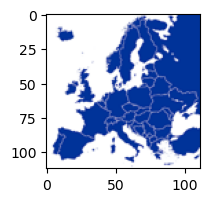

In [63]:
data = np.array(image)
plt.figure(figsize=(2, 2))
plt.imshow(data)
plt.show()

/tmp/ipykernel_83013/758515437.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  return math.sqrt(sum([(c1-c2)**2 for c1, c2 in zip(color1, color2)]))


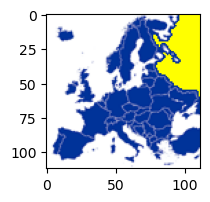

In [65]:
import math
def color_distance(color1, color2):
    # Defineix la distància euclidiana entre dos vectors: 'color1', 'color2'
    return math.sqrt(sum([(c1-c2)**2 for c1, c2 in zip(color1, color2)]))

def flood_fill(matrix, start_x, start_y, new_color):
    # Dimensions de la imatge
    width = len(matrix)
    height = len(matrix[0])
    
    def fill(x,y,start_color,color_to_update):
        # Condició de parada: Verifica si el píxel está dins dels límits de la matiu
        if x < 0 or x >= width or y < 0 or y >= height:
            return
        # Condició de parada: Verifica si el color del píxel al que estem es diferent al del color inicial
        if color_distance(matrix[x][y], start_color) > 0:
            return
        
        # Actualiza lo color del píxel
        matrix[x][y] = color_to_update
        # Acrualitzem veïns recursivament
        fill(x + 1, y, start_color, color_to_update)
        fill(x - 1, y, start_color, color_to_update)
        fill(x, y + 1, start_color, color_to_update)
        fill(x, y - 1, start_color, color_to_update)

    
    start_color = matrix[start_x][start_y].copy() # Agafem el color de la zona seleccionada
    fill(start_x,start_y,start_color,new_color)   # Fem la primera crida a l'algorisme amb el node inicial


newdata = data.copy()             # Fem una còpia per no modificar la 'data' actual
newcolor = [255,255,0]            # Color (RGB) que usarem per pintar. Són tres valors de 0 a 255. (RGB = Red, Green, Blue)
startpoint = (0, len(newdata)-1)  # Cantonada superior dreta

flood_fill(newdata, startpoint[0], startpoint[1], newcolor)

plt.figure(figsize=(2, 2))
plt.imshow(newdata)
plt.show()

# Problema 5
Donat un laberint com el que esteu usant a pràctiques, implementeu una funció que comprovi si té solució. La vostra funció ha de retornar True/False indicant si existeix un camí i una llista amb totes els nodes que s'han explorat.

In [67]:
# Funcio que retorna tots les posicions a les que es pot accedir desde el inici.
def bfs(G, origin):    
    visited = []
    cola = queue.Queue()
    
    visited.append(origin)
    cola.put(origin)    
    
    while not cola.empty():
        origin = cola.get()
        
        for nei in G.neighbors(origin):
            if nei not in visited:
                visited.append(nei)
                cola.put(nei)             
                
    return visited

In [68]:
def exist_path(G, source, dest, visited):
    condition = False
    
    visited = bfs(G, source)
    
    if dest in visited:
        condition = True    
    
    return condition, visited

Existeix camí: True


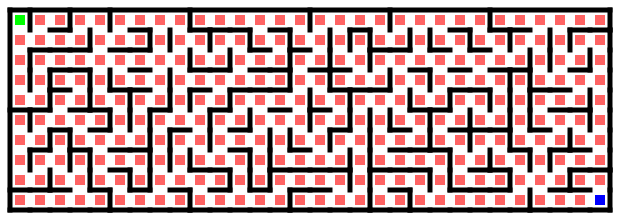

Existeix camí: False


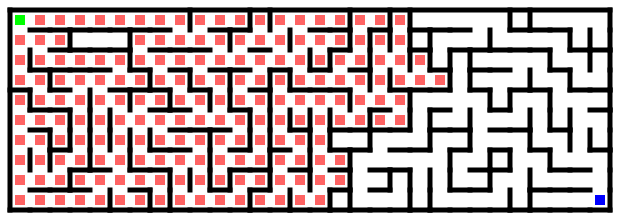

In [86]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from IPython.display import display_html

maze1 = Maze(30, 10, seed=17)
maze2 = Maze(30, 10, seed=15, p_build=0.25)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
for i, maze in enumerate([maze1, maze2]):
    G = maze.maze_graph()

    A = 0
    B = len(G.nodes)-1
    existeix, nodes_explorats = exist_path(G, A, B, set())
    
    print(f"Existeix camí: {existeix}")
    
    # Visualitzem
    maze.set_values(nodes_explorats, 1, color=(255,100,100))
    maze.set_value(A, 1, color=(0,255,0))
    maze.set_value(B, 1, color=(0,0,255))
    
    maze.display_maze(plot_path=True, height=200)